## <font color=red>Objectif:</font>

Développer un modèle prédictif de la donnée « valeur foncière » pour les ventes (nature de la mutation=Vente, hors VEFA) de maison et appartement (code type local=1 ou 2) uniquement

La construction de notre modèle prédictif passera par les étapes suivantes:
- Analyse exploratoire et traitement des données 
- Modélisation et évaluation.

Puis un tableau récapitulatif.

In [1]:
# Import des librairies manipulation des données
import pandas as pd
import numpy as np

In [2]:
# Import librairies de visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

/home/fienno/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Import librairie machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error, median_absolute_error
from sklearn.tree import DecisionTreeRegressor
#from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor

# <font color=red>Chargement et analyse exploratoire des données:</font>

Dans cet partie, nous sélectionnerons les observations correspondantes au type de locaux qui nous intéressent.

Nous observerons qu'un grand nombre de colonnes sont vides et qu'aussi de nombreuses observations sont manquantes.

In [4]:
# Lecture des données
df = pd.read_table('valeursfoncieres-2019.txt', sep='|')

/home/fienno/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# 3 premières observations du dataset
print("Les 3 premières observations du jeu de données: ")
print(df.head(3))
print('\n')
# dimensions globales du fichier
print('Le fichier comporte {} lignes et {} colonnes.'.format(df.shape[0], df.shape[1]))
print('\n')
print("La liste des intitulés des colomnes: ")
print(df.columns)
print('\n')
# Identifier les lignes et colonnes vides 
print("Identifions et comptons le nobmre d'observations vides du jeu de données: ")
print(df.isna().sum())

Les 3 premières observations du jeu de données: 
   Code service CH  Reference document  1 Articles CGI  2 Articles CGI  \
0              NaN                 NaN             NaN             NaN   
1              NaN                 NaN             NaN             NaN   
2              NaN                 NaN             NaN             NaN   

   3 Articles CGI  4 Articles CGI  5 Articles CGI  No disposition  \
0             NaN             NaN             NaN               1   
1             NaN             NaN             NaN               1   
2             NaN             NaN             NaN               1   

  Date mutation Nature mutation  ... Surface Carrez du 5eme lot  \
0    04/01/2019           Vente  ...                        NaN   
1    04/01/2019           Vente  ...                        NaN   
2    04/01/2019           Vente  ...                        NaN   

   Nombre de lots Code type local   Type local Identifiant local  \
0               1             2.0  Appar

# <font color=red>Traitement des données.</font>

 L'analyse précédente nous a confirmé l'existence de colonne vides et d'observations manquantes dans 
 plusieurs des colonnes qui nous intéressent. Dans ce notebook, nous allons supprimer les 
 observations comportant des données manquantes, nous identifierons les outliers sans les modifier.

In [6]:
print("Suppression des colonnes vides")
dfNaN = df.dropna(axis=1, how='all')
print("Vérification de la suppression effective des colonnes vides")
print(dfNaN.isna().sum())

Suppression des colonnes vides
Vérification de la suppression effective des colonnes vides
No disposition                      0
Date mutation                       0
Nature mutation                     0
Valeur fonciere                 29261
No voie                       1025638
B/T/Q                         2426362
Type de voie                  1053720
Code voie                       28189
Voie                            28354
Code postal                     28323
Commune                             0
Code departement                    0
Code commune                        0
Prefixe de section            2408956
Section                            74
No plan                             0
No Volume                     2529165
1er lot                       1753172
Surface Carrez du 1er lot     2314726
2eme lot                      2372713
Surface Carrez du 2eme lot    2481517
3eme lot                      2509709
Surface Carrez du 3eme lot    2530577
4eme lot                      25265

Sélectionner des observations qui nous intéressent:

il s'agit pour la colonne `Nature de la mutation` des `Vente en l'état futur d'achèvement`
et les colonnes 36 et 37: sélectionner les appartements (type 2) et maisons (type 1)

####  Détermination du contenu de chaque colonne d'intérêt:

In [7]:
print("Liste des valeurs distinctes dans la colonne Nature de la mutation:")
print(dfNaN['Nature mutation'].unique())
print("Nombre de valeurs unique: ")
print(dfNaN['Nature mutation'].nunique())
print('\n')
print("Liste des valeurs distinctes dans la colonne Code Type local:")
print(dfNaN['Code type local'].unique())
print("Nombre de valeurs unique: ")
print(dfNaN['Code type local'].nunique())
print('\n')
print("Liste des valeurs distinctes dans la colonne Type local:")
print(dfNaN['Type local'].unique())
print("Nombre de valeurs unique: ")
print(dfNaN['Type local'].nunique())
print('\n')
print("Liste des valeurs distinctes dans la colonne Date mutation: ")
print(dfNaN['Date mutation'].unique())
print("Nombre de valeurs unique: ")
print(dfNaN['Date mutation'].nunique())

Liste des valeurs distinctes dans la colonne Nature de la mutation:
['Vente' 'Echange' 'Vente terrain à bâtir'
 "Vente en l'état futur d'achèvement" 'Adjudication' 'Expropriation']
Nombre de valeurs unique: 
6


Liste des valeurs distinctes dans la colonne Code Type local:
[ 2.  3.  1. nan  4.]
Nombre de valeurs unique: 
4


Liste des valeurs distinctes dans la colonne Type local:
['Appartement' 'Dépendance' 'Maison' nan
 'Local industriel. commercial ou assimilé']
Nombre de valeurs unique: 
4


Liste des valeurs distinctes dans la colonne Date mutation: 
['04/01/2019' '08/01/2019' '07/01/2019' '03/01/2019' '12/01/2019'
 '09/01/2019' '15/01/2019' '11/01/2019' '16/01/2019' '21/01/2019'
 '10/01/2019' '17/01/2019' '18/01/2019' '14/01/2019' '23/01/2019'
 '24/01/2019' '22/01/2019' '25/01/2019' '28/01/2019' '31/01/2019'
 '29/01/2019' '30/01/2019' '01/02/2019' '04/02/2019' '05/02/2019'
 '13/02/2019' '08/02/2019' '07/02/2019' '12/02/2019' '11/02/2019'
 '06/02/2019' '14/02/2019' '15/02/2019' '1

####   Sélection et informations sur les colonnes d'intérêt

In [8]:
dfNaN_VEFA = dfNaN[dfNaN['Nature mutation'] == "Vente en l'état futur d'achèvement"]
print("Dimension du jeu de données restreint aux observations VEFA de la colonne Nature de la mutation. \n")
print('Ce jeu de données comporte', dfNaN_VEFA.shape[0],'lignes et',dfNaN_VEFA.shape[1],'colonnes liées au VEFA.')
print('\n')
dfNaN_appart_maison = dfNaN[(dfNaN['Nature mutation'] == "Vente en l'état futur d'achèvement") & ((dfNaN['Type local'] == "Appartement") | (dfNaN['Type local'] == "Maison"))]
print("Dimension du jeu de données restreint aux observations VEFA de la colonne Nature de la mutation et des appartements et maisons de la colonnes Type local. \n")
print('Ce jeu de données comporte', dfNaN_appart_maison.shape[0],'lignes et',dfNaN_appart_maison.shape[1],'colonnes liées au VEFA pour les appartements et les maisons.')
print("C'est donc sur ces données que nous allons porter notre attention.")
print('Nom des colonnes: \n')
print(dfNaN_appart_maison.columns)
print('\n')
print("Quelques informations sur les types des données contenues dans les différentes colonnes: \n")
print(dfNaN_appart_maison.info())
print('\n')

Dimension du jeu de données restreint aux observations VEFA de la colonne Nature de la mutation. 

Ce jeu de données comporte 185441 lignes et 35 colonnes liées au VEFA.


Dimension du jeu de données restreint aux observations VEFA de la colonne Nature de la mutation et des appartements et maisons de la colonnes Type local. 

Ce jeu de données comporte 6663 lignes et 35 colonnes liées au VEFA pour les appartements et les maisons.
C'est donc sur ces données que nous allons porter notre attention.
Nom des colonnes: 

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Su

Nous allons modifier le type des valeurs contenues dans certaines colonnes 

In [9]:
print("Colonnes Code voie et code commune transformé en string.")
dfNaN_appart_maison[['Code voie', 'Code commune']] = dfNaN_appart_maison[['Code voie', 'Code commune']].astype(str)

Colonnes Code voie et code commune transformé en string.


/home/fienno/.local/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
print("Changement du type de la Colonne valeurs foncière en numerique.")
def change_type_VF(data):
    data['Valeur fonciere'] = data['Valeur fonciere'].astype(str)
    data['Valeur fonciere'] = data['Valeur fonciere'].apply(lambda x: x.replace(',', '.'))
    data['Valeur fonciere'] = data['Valeur fonciere'].astype(float)
    return data

dfNaN_appart_maison = change_type_VF(dfNaN_appart_maison)

Changement du type de la Colonne valeurs foncière en numerique.


/home/fienno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/fienno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/fienno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [11]:
print("Vérification que les changements effectués sont effectifs")
print(dfNaN_appart_maison.info())

Vérification que les changements effectués sont effectifs
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6663 entries, 647 to 2527552
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   No disposition              6663 non-null   int64  
 1   Date mutation               6663 non-null   object 
 2   Nature mutation             6663 non-null   object 
 3   Valeur fonciere             6650 non-null   float64
 4   No voie                     5114 non-null   float64
 5   B/T/Q                       268 non-null    object 
 6   Type de voie                5788 non-null   object 
 7   Code voie                   6663 non-null   object 
 8   Voie                        6662 non-null   object 
 9   Code postal                 6661 non-null   float64
 10  Commune                     6663 non-null   object 
 11  Code departement            6663 non-null   object 
 12  Code commune               

In [12]:
print('Suppression des colonnes pour lesquelles plus de la moitié des valeurs sont manquantes')
colonnes = dfNaN_appart_maison.columns[dfNaN_appart_maison.isnull().sum() > 1000]
print(colonnes)
print('\n')
print("Nombre de colonnes à supprimer: ", len(colonnes))
dfAppartMaisonDrop = dfNaN_appart_maison.drop(colonnes, axis = 1)
print('\n')
print("Le jeu de données comporte maintenant", dfAppartMaisonDrop.shape[0], "lignes et", dfAppartMaisonDrop.shape[1], 'colonnes.')

Suppression des colonnes pour lesquelles plus de la moitié des valeurs sont manquantes
Index(['No voie', 'B/T/Q', 'Prefixe de section', 'No Volume',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nature culture', 'Nature culture speciale', 'Surface terrain'],
      dtype='object')


Nombre de colonnes à supprimer:  16


Le jeu de données comporte maintenant 6663 lignes et 19 colonnes.


In [13]:
print("Identification du nombre de cellules vides par colonnes:")
print(dfAppartMaisonDrop.isnull().sum())

Identification du nombre de cellules vides par colonnes:
No disposition                 0
Date mutation                  0
Nature mutation                0
Valeur fonciere               13
Type de voie                 875
Code voie                      0
Voie                           1
Code postal                    2
Commune                        0
Code departement               0
Code commune                   0
Section                        0
No plan                        0
1er lot                      399
Nombre de lots                 0
Code type local                0
Type local                     0
Surface reelle bati            3
Nombre pieces principales      3
dtype: int64


À ce stade, le jeu de données comporte 19 variables et une cible, 
les variables `Nature de mutation`  et `code type local` aussi seront supprimés.

De plus pour la construction du premier modèle, nous allons supprimer toutes les observations comportant des données manquantes.

Nous observons enfin que la variable cible comporte aussi des données manquantes.

In [20]:
print("Suppression des données manquantes dans tout le jeu de données.")
dfAppartMaisonRowsDrop = dfAppartMaisonDrop.dropna()
print('\n')
print("Suppression colonnes `Nature de mutation`, 'Code commune',`code type local`, 'No plan'")
dfAppartMaisonRowsDrop = dfAppartMaisonRowsDrop.drop(['Nature mutation', 'Code commune','Code type local', 'No plan'], axis = 1)

Suppression des données manquantes dans tout le jeu de données.


Suppression colonnes `Nature de mutation`, 'Code commune',`code type local`, 'No plan'


In [21]:
print("Changement de type des variables 'code postal' et 'Nombre pièces principales'")
dfAppartMaisonRowsDrop[['Code postal', 'No disposition']] = dfAppartMaisonRowsDrop[[ 'Code postal', 'No disposition']].astype(str)
dfAppartMaisonRowsDrop['Nombre pieces principales'] = dfAppartMaisonRowsDrop[ 'Nombre pieces principales'].astype(int)

Changement de type des variables 'code postal' et 'Nombre pièces principales'


In [22]:
print("Vérification que les observations comportant des valeurs manquantes ont bien été supprimées.")
dfAppartMaisonRowsDrop.isnull().sum()

Vérification que les observations comportant des valeurs manquantes ont bien été supprimées.


No disposition               0
Date mutation                0
Valeur fonciere              0
Type de voie                 0
Code voie                    0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Section                      0
1er lot                      0
Nombre de lots               0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
dtype: int64

In [23]:
print("Transformation des informations de la colonne Date mutation")
dfAppartMaisonRowsDrop['Jour'] = dfAppartMaisonRowsDrop['Date mutation'].apply(lambda x: x[0:2])
dfAppartMaisonRowsDrop['Mois'] = dfAppartMaisonRowsDrop['Date mutation'].apply(lambda x: x[3:5])
dfAppartMaisonRowsDrop['Annee'] = dfAppartMaisonRowsDrop['Date mutation'].apply(lambda x: x[6:])
print("Suppression de la colonne Date mutation")
dfAppartMaisonRowsDrop = dfAppartMaisonRowsDrop.drop('Date mutation', axis = 1)
print("Vérification des données")
dfAppartMaisonRowsDrop.info()

Transformation des informations de la colonne Date mutation
Suppression de la colonne Date mutation
Vérification des données
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 1748 to 2527552
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No disposition             5396 non-null   object 
 1   Valeur fonciere            5396 non-null   float64
 2   Type de voie               5396 non-null   object 
 3   Code voie                  5396 non-null   object 
 4   Voie                       5396 non-null   object 
 5   Code postal                5396 non-null   object 
 6   Commune                    5396 non-null   object 
 7   Code departement           5396 non-null   object 
 8   Section                    5396 non-null   object 
 9   1er lot                    5396 non-null   object 
 10  Nombre de lots             5396 non-null   int64  
 11  Type local                 53

In [24]:
dfAppartMaisonRowsDrop.head()

,No disposition,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Section,1er lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Jour,Mois,Annee
1748,1,210000.0,RUE,2880,DU PALAIS,1000.0,BOURG-EN-BRESSE,1,AD,6,1,Appartement,63.0,2,08,03,2019
2046,1,129000.0,AV,0231,DES ANCIENS COMBATTANTS,1000.0,BOURG-EN-BRESSE,1,AE,11,1,Appartement,21.0,1,19,03,2019
5368,1,520000.0,ALL,0167,DES MELEZES,1630.0,ST-GENIS-POUILLY,1,BD,13,1,Appartement,133.0,4,10,01,2019
5759,1,501500.0,ALL,0002,DES ACACIAS,1630.0,ST-GENIS-POUILLY,1,BD,14,1,Appartement,133.0,4,15,01,2019
5981,1,198000.0,RUE,0033,DU BREU,1710.0,THOIRY,1,BN,70,2,Appartement,43.0,2,01,02,2019


In [35]:
print("Liste des valeurs distinctes dans la colonne Annee: ")
print(dfAppartMaisonRowsDrop['Annee'].unique())
print("Nombre de valeurs unique: ")
print(dfAppartMaisonRowsDrop['Annee'].nunique())

Liste des valeurs distinctes dans la colonne Annee: 
['2019']
Nombre de valeurs unique: 
1


In [36]:
print('Suppression de la colonne Annee')
dfAppartMaisonRowsDrop = dfAppartMaisonRowsDrop.drop('Annee', axis = 1)
print("Vérification des données")
dfAppartMaisonRowsDrop.info()

Suppression de la colonne Annee
Vérification des données
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 1748 to 2527552
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No disposition             5396 non-null   object 
 1   Valeur fonciere            5396 non-null   float64
 2   Type de voie               5396 non-null   object 
 3   Code voie                  5396 non-null   object 
 4   Voie                       5396 non-null   object 
 5   Code postal                5396 non-null   object 
 6   Commune                    5396 non-null   object 
 7   Code departement           5396 non-null   object 
 8   Section                    5396 non-null   object 
 9   1er lot                    5396 non-null   object 
 10  Nombre de lots             5396 non-null   int64  
 11  Type local                 5396 non-null   object 
 12  Surface reelle bati        5396 non-null 

### <font color=blue>Analyse exploratoire du jeu de données issu de cette transformation</font>

#### <font color=blue>Visualisation de certaines variables</font>

In [37]:
print("Mise à jour des informations sur les types des données")
dfAppartMaisonRowsDrop.info()

Mise à jour des informations sur les types des données
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 1748 to 2527552
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No disposition             5396 non-null   object 
 1   Valeur fonciere            5396 non-null   float64
 2   Type de voie               5396 non-null   object 
 3   Code voie                  5396 non-null   object 
 4   Voie                       5396 non-null   object 
 5   Code postal                5396 non-null   object 
 6   Commune                    5396 non-null   object 
 7   Code departement           5396 non-null   object 
 8   Section                    5396 non-null   object 
 9   1er lot                    5396 non-null   object 
 10  Nombre de lots             5396 non-null   int64  
 11  Type local                 5396 non-null   object 
 12  Surface reelle bati        5396 non-null   

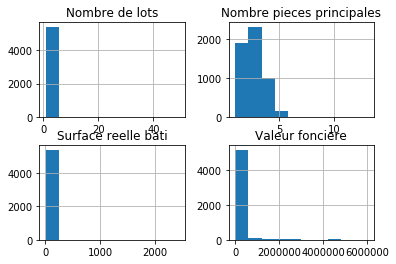

In [18]:
dfAppartMaisonRowsDrop.hist()
plt.show()

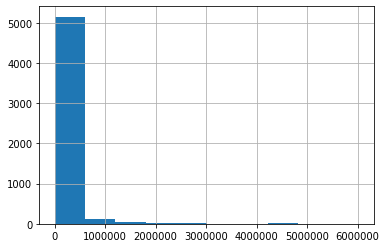

In [19]:
dfAppartMaisonRowsDrop['Valeur fonciere'].hist()
plt.show()

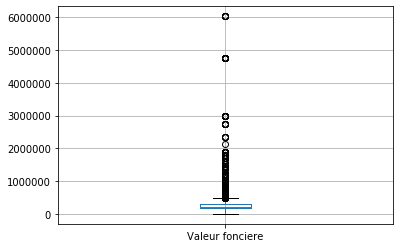

In [21]:
dfAppartMaisonRowsDrop[['Valeur fonciere']].boxplot()
plt.show()

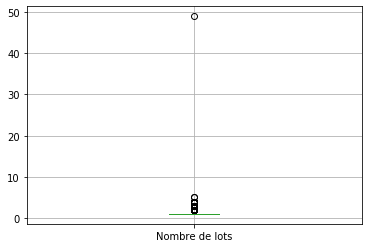

In [22]:
dfAppartMaisonRowsDrop[['Nombre de lots']].boxplot()
plt.show()

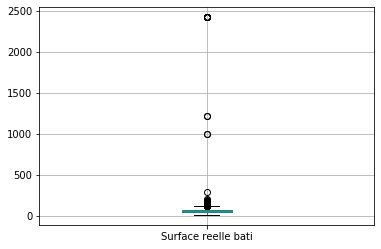

In [23]:
dfAppartMaisonRowsDrop[['Surface reelle bati']].boxplot()
plt.show()

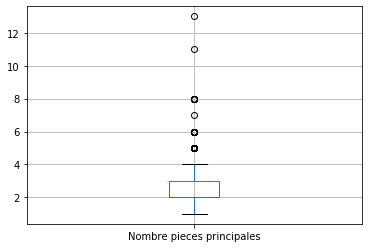

In [24]:
dfAppartMaisonRowsDrop[['Nombre pieces principales']].boxplot()
plt.show()

Il apparait, au regard, des graphiques précédant qu'il y a de nombreux outliers et que les données sont très "écrasées".

#### <font color=blue>Statistque descriptive</font>

In [25]:
dfAppartMaisonRowsDrop.describe()

,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales
count,5.396000e+03,5396.000000,5396.000000,5396.000000
mean,3.099644e+05,1.159007,65.807821,2.841549
std,4.604522e+05,0.789595,97.586265,0.945358
min,1.000000e+00,1.000000,11.000000,1.000000
25%,1.720000e+05,1.000000,44.000000,2.000000
50%,2.250000e+05,1.000000,61.000000,3.000000
75%,3.000000e+05,1.000000,72.250000,3.000000
max,6.026894e+06,49.000000,2426.000000,13.000000


### <font color=green>Détection des outliers</font>

In [29]:
def outliersVF(data):
    '''Cette fonction permet de détecter les outliers:
    en entrée nous avons le jeu de données
    IQR représente l'intervale interquartile calculé par la différence entre le 1er et le 3ème quartile
    en sortie on a les outliers inférieurs (bas) et supérieurs (haut)
    '''
    IQR = data.describe()['Valeur fonciere']['75%'] - data.describe()['Valeur fonciere']['25%']
    bas = data.describe()['Valeur fonciere']['25%'] -1.5*IQR
    haut = data.describe()['Valeur fonciere']['75%'] + 1.5*IQR
    return bas, haut

In [30]:
outliersSup = outliersVF(dfAppartMaisonRowsDrop)
dfAppartMaisonRowsDrop[dfAppartMaisonRowsDrop['Valeur fonciere'] > outliersSup[1]].count()

No disposition               369
Valeur fonciere              369
Type de voie                 369
Code voie                    369
Voie                         369
Code postal                  369
Commune                      369
Code departement             369
Section                      369
1er lot                      369
Nombre de lots               369
Type local                   369
Surface reelle bati          369
Nombre pieces principales    369
Jour                         369
Mois                         369
Annee                        369
dtype: int64

In [33]:
'''
Cette partie permet de supprimer, si besoin les outliers à partir d'un certain seuil
'''
'''
Suppresssion des observations ayant des outliers dans la colonne Valeur foncière
indexOutliers = dfAppartMaisonRowsDrop[dfAppartMaisonRowsDrop['Valeur fonciere'] > outliersSup[1]].index
dfAppartMaisonRowsDrop.drop(indexOutliers, inplace = True)

print('Verification de la suppression des outliers.')'
dfAppartMaisonRowsDrop[dfAppartMaisonRowsDrop['Valeur fonciere'] > outliersSup[1]].count()
'''

Les graphes, ci-après, représente les données numériques après suppression des outliers,on observe bien la différence par rapport au cas ou l'on conserve ces outliers

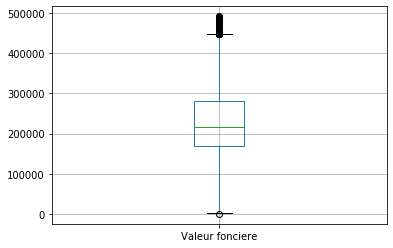

In [35]:
dfAppartMaisonRowsDrop[['Valeur fonciere']].boxplot()
plt.show()

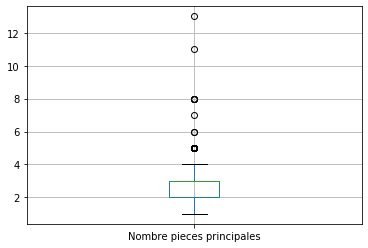

In [36]:
dfAppartMaisonRowsDrop[['Nombre pieces principales']].boxplot()
plt.show()

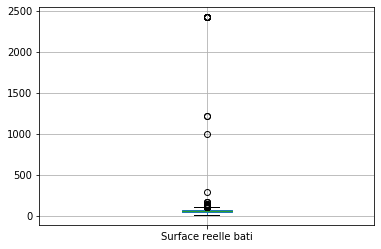

In [37]:
dfAppartMaisonRowsDrop[['Surface reelle bati']].boxplot()
plt.show()

### <font color=green>Séparation des variables en deux groupes</font>

In [38]:
print("Information sur le type et la taille du jeu de données avant séparation.")
dfAppartMaisonRowsDrop.info()

Information sur le type et la taille du jeu de données avant séparation.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 1748 to 2527552
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No disposition             5396 non-null   object 
 1   Valeur fonciere            5396 non-null   float64
 2   Type de voie               5396 non-null   object 
 3   Code voie                  5396 non-null   object 
 4   Voie                       5396 non-null   object 
 5   Code postal                5396 non-null   object 
 6   Commune                    5396 non-null   object 
 7   Code departement           5396 non-null   object 
 8   Section                    5396 non-null   object 
 9   1er lot                    5396 non-null   object 
 10  Nombre de lots             5396 non-null   int64  
 11  Type local                 5396 non-null   object 
 12  Surface reelle bati      

### <font color=black>Variable qualitative</font>

In [39]:
print("DataFrame des variables qualitatives.")
dfAppartMaisonRowsDropQualitatif = dfAppartMaisonRowsDrop.select_dtypes(include ='object')

DataFrame des variables qualitatives.


In [40]:
dfAppartMaisonRowsDropQualitatif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 1748 to 2527552
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No disposition    5396 non-null   object
 1   Type de voie      5396 non-null   object
 2   Code voie         5396 non-null   object
 3   Voie              5396 non-null   object
 4   Code postal       5396 non-null   object
 5   Commune           5396 non-null   object
 6   Code departement  5396 non-null   object
 7   Section           5396 non-null   object
 8   1er lot           5396 non-null   object
 9   Type local        5396 non-null   object
 10  Jour              5396 non-null   object
 11  Mois              5396 non-null   object
dtypes: object(12)
memory usage: 548.0+ KB


In [41]:
print("Statistique descriptive")
dfAppartMaisonRowsDropQualitatif.describe()

Statistique descriptive


,No disposition,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Section,1er lot,Type local,Jour,Mois
count,5396,5396,5396,5396,5396,5396,5396,5396,5396.0,5396,5396,5396
unique,2,33,1127,1475,737,743,78,237,800.0,2,31,12
top,1,RUE,0620,JEAN JAURES,31200.0,TOULOUSE,31,AK,1.0,Appartement,28,01
freq,5387,2941,53,51,111,236,426,250,87.0,5247,264,776


In [42]:
print("Changement de l'encodage pour construction du modèle.")
dummy_dfAppartMaisonRowsDropQualitatif = pd.get_dummies(dfAppartMaisonRowsDropQualitatif)

Changement de l'encodage pour construction du modèle.


In [43]:
print("Information sur ces variables")
print(dummy_dfAppartMaisonRowsDropQualitatif.info())

Information sur ces variables
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 1748 to 2527552
Columns: 5277 entries, No disposition_1 to Mois_12
dtypes: uint8(5277)
memory usage: 27.2 MB
None


In [44]:
dummy_dfAppartMaisonRowsDropQualitatif[45:47]

,No disposition_1,No disposition_2,Type de voie_ACH,Type de voie_ALL,Type de voie_AV,Type de voie_BD,Type de voie_CHE,Type de voie_CHEM,Type de voie_CITE,Type de voie_COR,...,Mois_03,Mois_04,Mois_05,Mois_06,Mois_07,Mois_08,Mois_09,Mois_10,Mois_11,Mois_12
19713,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19869,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### <font color=black>Variable quantitative</font>

In [45]:
print("DataFrame des variables quantitatives.")
dfAppartMaisonRowsDropQuantitatif = dfAppartMaisonRowsDrop.select_dtypes(include ='number')

DataFrame des variables quantitatives.


In [46]:
dfAppartMaisonRowsDropQuantitatif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 1748 to 2527552
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Valeur fonciere            5396 non-null   float64
 1   Nombre de lots             5396 non-null   int64  
 2   Surface reelle bati        5396 non-null   float64
 3   Nombre pieces principales  5396 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 210.8 KB


In [47]:
dfAppartMaisonRowsDropQuantitatif.head()

,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales
1748,210000.0,1,63.0,2
2046,129000.0,1,21.0,1
5368,520000.0,1,133.0,4
5759,501500.0,1,133.0,4
5981,198000.0,2,43.0,2


In [48]:
print("Statistique descriptive")
dfAppartMaisonRowsDropQuantitatif.describe()

Statistique descriptive


,Valeur fonciere,Nombre de lots,Surface reelle bati,Nombre pieces principales
count,5.396000e+03,5396.000000,5396.000000,5396.000000
mean,3.099644e+05,1.159007,65.807821,2.841549
std,4.604522e+05,0.789595,97.586265,0.945358
min,1.000000e+00,1.000000,11.000000,1.000000
25%,1.720000e+05,1.000000,44.000000,2.000000
50%,2.250000e+05,1.000000,61.000000,3.000000
75%,3.000000e+05,1.000000,72.250000,3.000000
max,6.026894e+06,49.000000,2426.000000,13.000000


### <font color=blue>Fusion des deux dataframe.</font>

In [49]:
print("Fusion des deux dataframe qualitatif et quantitatif en un seul")
dfFusion_QalQant = pd.merge(dfAppartMaisonRowsDropQuantitatif, dummy_dfAppartMaisonRowsDropQualitatif, right_index=True, left_index=True)

Fusion des deux dataframe qualitatif et quantitatif en un seul


# <font color=red>Modélisation et évaluation.</font>

Notre choix de modèle portera sur:
- Un arbre de décision
- Une forêt d'arbre de décision.
- Un arbre décision randomisé
- Un arbre de décision 'boosté'

Notre choix s'est porté sur l'arbre de décision car il n'est pas sensible aux valeurs extrêmes.

In [50]:
print("Dimension du nouveau jeu de données: ", dfFusion_QalQant.shape[0], "lignes et ", dfFusion_QalQant.shape[1], "colonnes")
print("Informations sur le type des données.")
dfFusion_QalQant.info()

Dimension du nouveau jeu de données:  5396 lignes et  5281 colonnes
Informations sur le type des données.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 1748 to 2527552
Columns: 5281 entries, Valeur fonciere to Mois_12
dtypes: float64(2), int64(2), uint8(5277)
memory usage: 27.5 MB


### <font color=blue>Sélection de variables.</font>

Une observation claire pour nous est le nombre pléthorique de variable au regard du nombre d'observations.

In [ ]:
"""
RFE: Feature selection
"""
"""
print("Selection with Decision Tree Regressor")
tree = DecisionTreeRegressor()
selecteur = RFE(estimator = tree, n_features_to_select = 75)  # on peut choisir le nombre de feature n_features_to_select = ....
sol = selecteur.fit(X_train, y_train)
print(sol.n_features_)
print("Identification des variables les plus pertinentes")
variables = list(zip(sol.support_, X.columns))
interval = 15
indexe = 5910
variables[indexe:indexe + interval]
print(sol.support_)
print(sol.ranking_)
"""

"""
X_train_new = X_train[:, sol.support_]
print(X_train_new.shape)
X_test_new = X_test[:, sol.support_]

"""

In [51]:
print("Coefficient de correlation de Peason's")
cor = dfFusion_QalQant.corr()
cor_target = abs(cor['Valeur fonciere'])

Coefficient de correlation de Peason's


In [161]:
print("Selection des variables en fonction d'un seuil")
seuil = 0.02355
print("seuil = ", seuil)
best_features = cor_target[cor_target > seuil]
print("Pour un seuil de:", seuil, ", il y a:", len(best_features), "variables.")

Selection des variables en fonction d'un seuil
seuil =  0.02355
Pour un seuil de: 0.02355 , il y a: 204 variables.


In [162]:
dfSelected = dfFusion_QalQant[list(set(best_features.index))]
X = dfSelected.drop('Valeur fonciere', axis = 1)
y = dfSelected['Valeur fonciere']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, test_size=0.2)

In [135]:
print("Liste des variables les plus pertinentes en fonction d'un seuil:")
seuil = 0.1
print("seuil = ", seuil)
best_features = cor_target[cor_target > seuil]
print(list(best_features.index))

Liste des variables les plus pertinentes en fonction d'un seuil:
seuil =  0.1
['Valeur fonciere', 'Code voie_0063', 'Code voie_1075', 'Code voie_1263', 'Code voie_4160', 'Code voie_5204', 'Code voie_6640', 'Code voie_6868', 'Voie_CAP DE CROIX', 'Voie_CHARLES DE GAULLE', 'Voie_COMTESSE LILY PASTRE', 'Voie_DES GRESILLONS', 'Voie_DU PIN', 'Voie_JULES GUESDE', 'Voie_MAGIN', 'Voie_PARMENTIER', 'Code postal_13010.0', 'Code postal_44300.0', 'Code postal_6100.0', 'Code postal_77100.0', 'Commune_MARSEILLE 10EME', 'Commune_NANTES', 'Commune_NANTEUIL-LES-MEAUX', 'Code departement_44', 'Code departement_92', 'Section_EW', 'Section_NT', 'Jour_26', 'Mois_02']


#### <font color=blue>Modèle et Mesure de performance du modèle.</font>

In [163]:
reel = y_test

In [150]:
def performance(algo_name,reel, predit):
    mae = round(mean_absolute_error(reel,predit),2)
    mdae = round(median_absolute_error(reel,predit),2)
    r2 = round(r2_score(reel, predit),2)
    return algo_name,mae, mdae, r2

##### <font color=black>Warning !!.</font>
S'assurer lorsqu'on choisit une modélisation avec toutes les variables (X_train, X_test) ou avec sélection de variable (X_train_new, X_test_new) d'effectuer les changements.

##### <font color=black>Gradient Boosting Regressor.</font>

In [164]:
def trainGradient(X,y):
    grad = GradientBoostingRegressor(random_state=0).fit(X,y)
    return grad
modelG = trainGradient(X_train, y_train)

In [165]:
algo_name = "Gradient Regressor"
y_pred=modelG.predict(X_test)
predit = y_pred
print(algo_name)
print("Mean Absolute Error: ", performance(algo_name, reel, predit)[1])
print("Median absolute error: ", performance(algo_name, reel, predit)[2])
print("R2: ", performance(algo_name, reel, predit)[3])

Gradient Regressor
Mean Absolute Error:  73726.2
Median absolute error:  46766.16
R2:  0.9


##### <font color=black>RF Regressor.</font>

In [166]:
def trainRFRegressor(X,y):
    rfR = RandomForestRegressor(max_depth=5, random_state=0).fit(X,y)
    return  rfR
modelR = trainRFRegressor(X_train, y_train)

In [167]:
algo_name = "RF Regressor"
y_pred=modelR.predict(X_test)
predit = y_pred
print(algo_name)
print("Mean Absolute Error: ", performance(algo_name, reel, predit)[1])
print("Median absolute error: ", performance(algo_name, reel, predit)[2])
print("R2: ", performance(algo_name, reel, predit)[3])

RF Regressor
Mean Absolute Error:  105829.8
Median absolute error:  67763.52
R2:  0.78


##### <font color=black>Extra Trees Regressor.</font>

In [168]:
def trainTreeRegressor(X,y):
    treeR = ExtraTreesRegressor(random_state=0).fit(X,y)
    return  treeR
modelT = trainTreeRegressor(X_train, y_train)

In [169]:
algo_name = "Extra Tree Regressor"
y_pred=modelT.predict(X_test)
predit = y_pred
print(algo_name)
print("Mean Absolute Error: ", performance(algo_name, reel, predit)[1])
print("Median absolute error: ", performance(algo_name, reel, predit)[2])
print("R2 score: ", performance(algo_name, reel, predit)[3])

Extra Tree Regressor
Mean Absolute Error:  65506.27
Median absolute error:  34238.89
R2 score:  0.89


##### <font color=black>Decisison Tree Regressor.</font>

In [170]:
def decisionTree(X,y):
    dt = DecisionTreeRegressor(random_state=0).fit(X,y)
    return dt
modelD = decisionTree(X_train, y_train)

In [171]:
algo_name = "Decision Tree Regressor"
y_pred=modelD.predict(X_test)
predit = y_pred
print(algo_name)
print("Mean Absolute Error: ", performance(algo_name, reel, predit)[1])
print("Median absolute error: ", performance(algo_name, reel, predit)[2])
print("R2 score: ", performance(algo_name, reel, predit)[3])

Decision Tree Regressor
Mean Absolute Error:  73040.99
Median absolute error:  35000.0
R2 score:  0.76


# <font color=red>Tableaux récapitulatifs</font>

Tableau récapitulatif des Median Absolute Error

| Nombre variables| Decision Tree  | Random Forest   | Gradient Boost|ExtraTrees  |
|:-----------    | :-------------: | :----------: | :-----------: | ------------:|
| 105            |     34279.04    |    67903     |    46424.67    |  34515.5   |
| 204            |    35080     |     67763.52    |     46754.16   | 34238.89 |
|Toutes          |    20948.0  |      66256.39   |    43297.17    |  17152.48   |

Tableau récapitulatif des Mean Absolute Error

| Nombre variables| Decision Tree  | Random Forest   | Gradient Boost | ExtraTrees  |
|:-----------    | :-------------: | :----------: | :-----------: | ------------:|
| 105            |     71906.34    |    106414.32     |   78364.35     |  68040.2   |
| 204            |    73040.99     |    105829.8     |     73726.2     |   65506.27  |
|Toutes          |    56273.27     |    104278.64    |     69987.03   |   42289.01  |